In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle


Import cleaned datasets of cations and anions described by 2D and 3D physical descriptors

In [3]:
cat3d_input = pd.read_pickle('cat3d_input.pkl')
an3d_input = pd.read_pickle('an3d_input.pkl')

In [4]:
cation_name=cat3d_input["Cation_Name"]
anion_name=an3d_input["Anion_Name"]
label=cat3d_input["Accepted"]

In [5]:
cation_name.to_pickle('cation_name.pkl')
anion_name.to_pickle('anion_name.pkl')
label.to_pickle('label.pkl')

In [6]:
cat_df = cat3d_input.iloc[:, 3:]
an_df = an3d_input.iloc[:, 3:]

In [7]:
an_df

,Anion_Mass,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,14.330127,0.955342,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5,2.875
1,180.132,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,7.936238,2.236068,4.472136,7.936238,0.881804,...,8.815370,37.856472,179.924229,19.991581,88,6,42.0,40.0,6.375,1.750
2,197.658,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,4.000000,4.000000,0.800000,...,7.625107,29.418928,195.810897,39.162179,16,0,20.0,16.0,4.0625,1.000
3,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,14.330127,0.955342,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5,2.875
4,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,14.330127,0.955342,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5,2.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,14.330127,0.955342,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5,2.875
1790,66.042,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,5.464102,1.732051,3.464102,5.464102,1.092820,...,6.192362,25.583106,66.009771,13.201954,20,2,14.0,12.0,2.75,1.500
1791,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,14.330127,0.955342,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5,2.875
1792,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,14.330127,0.955342,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5,2.875


In [8]:
# Check data types
print(cat_df.dtypes)

Cation_Mass    float64
ABC             object
ABCGG           object
nAcid            int64
nBase            int64
                ...   
WPol             int64
Zagreb1        float64
Zagreb2        float64
mZagreb1       float64
mZagreb2       float64
Length: 1827, dtype: object


Remove columns that contain all zeros, or NAN or infinite from both dataframes

In [9]:
#Transform objects into numerical values

for col in cat_df.select_dtypes(include=['object']).columns:
    # Attempt conversion to numeric type
    cat_df[col] = pd.to_numeric(cat_df[col], errors='coerce')
    

for col in an_df.select_dtypes(include=['object']).columns:
    # Attempt conversion to numeric type
    an_df[col] = pd.to_numeric(an_df[col], errors='coerce')
    
    


In [10]:
print(cat_df.dtypes)

Cation_Mass    float64
ABC            float64
ABCGG          float64
nAcid            int64
nBase            int64
                ...   
WPol             int64
Zagreb1        float64
Zagreb2        float64
mZagreb1       float64
mZagreb2       float64
Length: 1827, dtype: object


In [11]:
print(an_df.dtypes)

Anion_Mass    float64
ABC           float64
ABCGG         float64
nAcid           int64
nBase           int64
               ...   
WPol            int64
Zagreb1       float64
Zagreb2       float64
mZagreb1      float64
mZagreb2      float64
Length: 1827, dtype: object


In [12]:
cat_zeros = cat_df.columns[(cat_df == 0).all()]
print("Columns that are all zeros:", cat_zeros)
an_zeros = cat_df.columns[(an_df == 0).all()]
print("Columns that are all zeros:", an_zeros)

Columns that are all zeros: Index(['nSpiro', 'nB', 'nI', 'C4SP3', 'NsLi', 'NssBe', 'NssssBe', 'NssBH',
       'NsssB', 'NssssB',
       ...
       'n12FARing', 'nG12FARing', 'n4FAHRing', 'n5FAHRing', 'n6FAHRing',
       'n7FAHRing', 'n9FAHRing', 'n10FAHRing', 'n12FAHRing', 'nG12FAHRing'],
      dtype='object', length=183)
Columns that are all zeros: Index(['C2SP1', 'Xch-3d', 'Xch-4d', 'Xch-3dv', 'Xch-4dv', 'NsLi', 'NssBe',
       'NssssBe', 'NssBH', 'NsssB',
       ...
       'n12FARing', 'nG12FARing', 'n4FAHRing', 'n5FAHRing', 'n6FAHRing',
       'n7FAHRing', 'n11FAHRing', 'n12FAHRing', 'nG12FAHRing', 'SRW03'],
      dtype='object', length=198)


In [13]:
print("Number of all-zeros features in cations",len(cat_zeros))
print("Number of all-zeros features in anions",len(an_zeros))


Number of all-zeros features in cations 183
Number of all-zeros features in anions 198


In [14]:
cat_df_clean = cat_df.drop(columns=cat_zeros)
an_df_clean = an_df.drop(columns=an_zeros)

In [15]:
print("The shape of cat_df_clean is:",cat_df_clean.shape)
print("The shape of an_df_clean is:",an_df_clean.shape)

The shape of cat_df_clean is: (1762, 1644)
The shape of an_df_clean is: (1762, 1629)


In [16]:
# Find columns with NaN values
nan_columns = cat_df_clean.columns[cat_df_clean.isnull().any()].tolist()
# Find columns with infinity values
inf_columns = cat_df_clean.replace([np.inf, -np.inf], np.nan).columns[cat_df_clean.replace([np.inf, -np.inf], np.nan).isnull().any()].tolist()
# Combine the lists and get unique column names
columns_with_nan_or_inf = list(set(nan_columns + inf_columns))
# Initialize list to hold column names to remove
columns_to_remove = []

# Loop through columns and count NaN values
for col in columns_with_nan_or_inf:
    nan_count = cat_df_clean[col].isnull().sum()
    if nan_count > 0:
        columns_to_remove.append(col)

# Remove columns from the dataframe where NaN count is greater than 100
cat_df_clean = cat_df_clean.drop(columns=columns_to_remove)

In [17]:
# Find columns with NaN values
nan_columns = an_df_clean.columns[an_df_clean.isnull().any()].tolist()
# Find columns with infinity values
inf_columns = an_df_clean.replace([np.inf, -np.inf], np.nan).columns[an_df_clean.replace([np.inf, -np.inf], np.nan).isnull().any()].tolist()
# Combine the lists and get unique column names
columns_with_nan_or_inf = list(set(nan_columns + inf_columns))
# Initialize list to hold column names to remove
columns_to_remove = []

# Loop through columns and count NaN values
for col in columns_with_nan_or_inf:
    nan_count = an_df_clean[col].isnull().sum()
    if nan_count > 0:
        columns_to_remove.append(col)

# Remove columns from the dataframe where NaN count is greater than 100
an_df_clean = an_df_clean.drop(columns=columns_to_remove)

In [18]:
print("Shape of the cleaned dataframe of cations",cat_df_clean.shape)
print("Shape of the cleaned dataframe of anions",an_df_clean.shape)

Shape of the cleaned dataframe of cations (1762, 1090)
Shape of the cleaned dataframe of anions (1762, 672)


In [19]:
cat_df_clean.to_pickle('cat_reduced.pkl')
an_df_clean.to_pickle('an_reduced.pkl')

## import Machine Learning libraries

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [21]:
imputer = SimpleImputer(strategy='mean')
cleaned_cat_data = imputer.fit_transform(cat_df_clean)
scaler = StandardScaler()
scaled_cat_data = scaler.fit_transform(cleaned_cat_data)

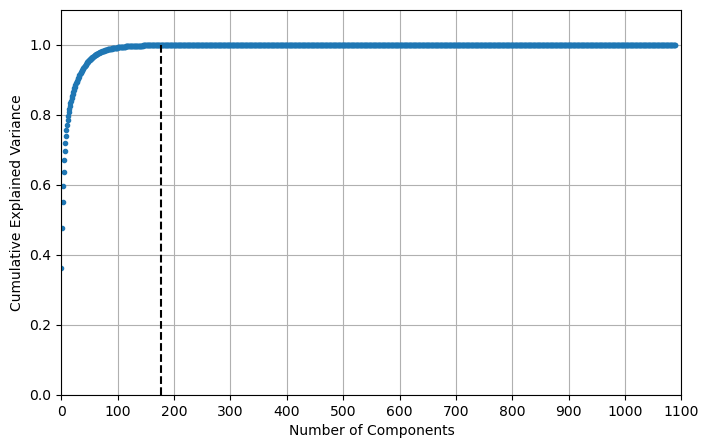

In [22]:
pca_cat = PCA()
pca_cat.fit(scaled_cat_data)
# Plotting the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_cat.explained_variance_ratio_),'.')
ind_cat=np.where(np.abs(1 - np.cumsum(pca_cat.explained_variance_ratio_)) < 1e-3)[0][0]
plt.plot(np.array([ind_cat,ind_cat]),np.array([0,1]),'k--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(0,1200,100))

plt.xlim([0,1100])
plt.ylim([0,1.1])
plt.grid(True)
plt.show()

In [23]:
imputer = SimpleImputer(strategy='mean')
cleaned_an_data = imputer.fit_transform(an_df_clean)
scaler = StandardScaler()
scaled_an_data = scaler.fit_transform(cleaned_an_data)

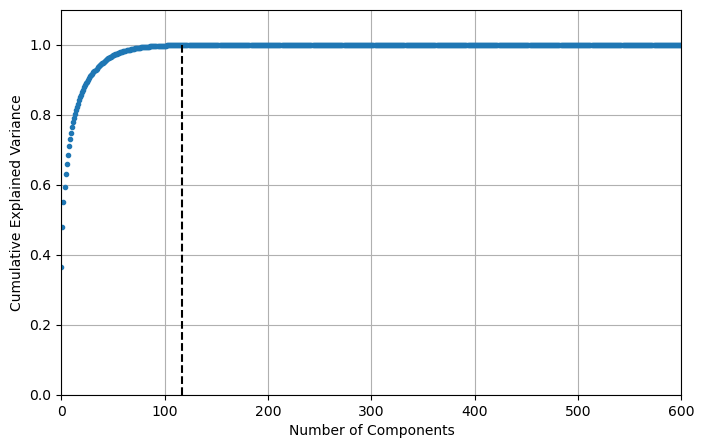

In [24]:
pca_an = PCA()
pca_an .fit(scaled_an_data)
# Plotting the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_an .explained_variance_ratio_),'.')

ind_an=np.where(np.abs(1 - np.cumsum(pca_an .explained_variance_ratio_)) < 1e-3)[0][0]
plt.plot(np.array([ind_an,ind_an]),np.array([0,1]),'k--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(0,1200,100))
plt.xlim([0,600])
plt.ylim([0,1.1])
plt.grid(True)
plt.show()

In [25]:
print("The minimum number of features necessary to conserve 99.99% of the variance of the cation dataset is:",ind_cat)
print("The minimum number of features necessary to conserve 99.99% of the variance of the anion dataset is:",ind_an)

The minimum number of features necessary to conserve 99.99% of the variance of the cation dataset is: 177
The minimum number of features necessary to conserve 99.99% of the variance of the anion dataset is: 117


---

In [27]:
pca_cat_components = pca_cat.components_

In [37]:
feature_names=cat_df_clean.columns

In [43]:
pca_cat_components = pca_cat.components_

n_features = pca_cat_components.shape[1]  # Number of features
feature_names=cat_df_clean.columns
for i, component in enumerate(pca_cat_components[0:1]):
    component_features = list(zip(feature_names, component))
    sorted_features = sorted(component_features, key=lambda x: abs(x[1]), reverse=True)
    print(f"Principal Component {i+1}:")
    for feature, weight in sorted_features:
        print(f"{feature}: {weight}")
    print()  # Add a blank line between components for readability





Principal Component 1:
ATS1v: 0.05064484319920373
SMR: 0.05063163797130357
Sv: 0.050597032173969825
Sp: 0.05059550716764876
apol: 0.05059550716764876
VMcGowan: 0.050588026930171934
Vabc: 0.05058610497813876
ATS0v: 0.05058572166043752
ATS2v: 0.05053664581331676
ATSC0v: 0.05051960603554063
ATS1p: 0.050467589495393365
SZ: 0.050461553128332566
ETA_alpha: 0.05045694668631658
nBonds: 0.05045512426172088
Spe: 0.0504318589497548
Sare: 0.050425549008046
ATS1se: 0.0504168044899232
LabuteASA: 0.050416238376628036
Sse: 0.050414332663197184
ATS0se: 0.05040807483839628
ATS0pe: 0.05040569315597002
ATS3v: 0.050403028066109294
ATS1pe: 0.05040099999106687
nAtom: 0.050392304958085866
ATS0are: 0.0503785902468069
ATS1are: 0.0503724656368444
ATS0p: 0.050363414502204766
ATS1i: 0.05036190112023022
Si: 0.050361738392647744
ZMIC0: 0.05034392039303142
ATS0i: 0.050334378850933566
ATS3d: 0.0503135848840594
nC: 0.05031329835319929
MW: 0.05030684979553691
Cation_Mass: 0.05030555066884139
Sm: 0.050302428598984816
ATS